# Perustulo
Antti Tanskanen,
22.2.2022

Tässä työkirjassa käytetään fin_benefits-kirjastosta muokattua versiota, jossa on toteutettu erilaisia perustulomalleja. Tavoitteena on arvioida perustulon vaikutusta työnteon kannusteisiin.

Perustulomalli perustuu Eduskunnan sisäisen laskentapalvelun Vihreille tekemään laskentaan.

Perustulon oletetaan korvaavan työmarkkinatuen ja peruspäivärahan perusosat sekä kotihoidontuen ja opintotuen. Samoin verotusta muutetaan vastaavasti kuin Eduskunnan laskentapalvelun laskelmassa. Toimeentulotuki, ansiosidonnainen työttömyysturva ja työmarkkinatuen lapsikorotukset säilyvät mallissa, samoin kuin asumistuki. Perustulo huomioidaan kuitenkin näiden osana.

## Python-kirjasto

Perustulo on toteutettu Python-kirjastossa fin_benefit.

In [1]:
# for Colab, install fin_benefits from Github
#!pip install git+https://github.com/ajtanskanen/benefits.git

In [2]:
# haetaan tarpeelliset kirjastot
import fin_benefits # määrittelee luokan, jossa on sosiaaliturvafunktiot yms
import numpy as np 

# kuvat suuremmiksi
import matplotlib.pyplot as plt


/Users/anttitanskanen/opt/miniconda3/envs/py37/lib/python3.7/site-packages/ale_py/roms/utils.py:90: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for external in metadata.entry_points().get(self.group, []):


In [3]:
plt.rcParams['figure.figsize'] = [10, 5]

## Nykytila

Laskee työllisyysveroaste, työnteon efektiivisen marginaalivero ja käteen jäävä ansio kirjaston avulla. Valitaan ensin tyyppitapaus. Muuttuja p kertoo tarkat tiedot laskennankohteesta, selite sisältää kuvauksen siitä ja parametri tulosta kehottaa printtaamaan selite:en.

In [4]:
p,selite=fin_benefits.perheparametrit(perhetyyppi=2,tulosta=True)

1 aikuinen, ei lapsia. Työtön (ansiopvraha, peruste 2500 e/kk), ei puolisoa.


In [5]:
#fin_benefits.print_examples()
#p['vakiintunutpalkka']=2700

Tarkastetaan vielä, millaisia parametrejä p:hen on syötetty

Itse laskenta koostuu kahdesta rivistä koodia. Alustetaan objektia ben kirjastosta fin_benefits. Tämän jälkeen sitä voi kutsua laskemaan marginaalit ja plottamaan ne.

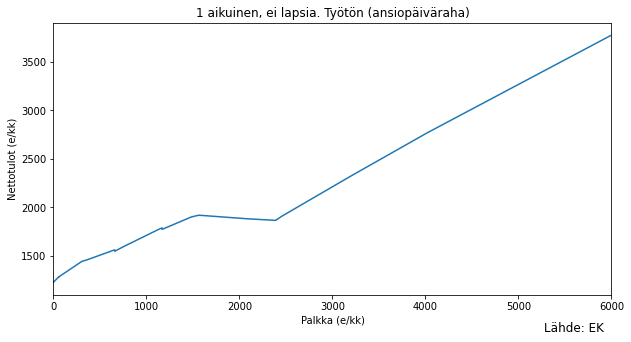

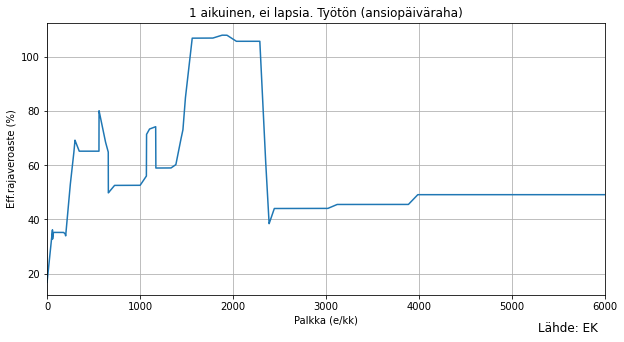

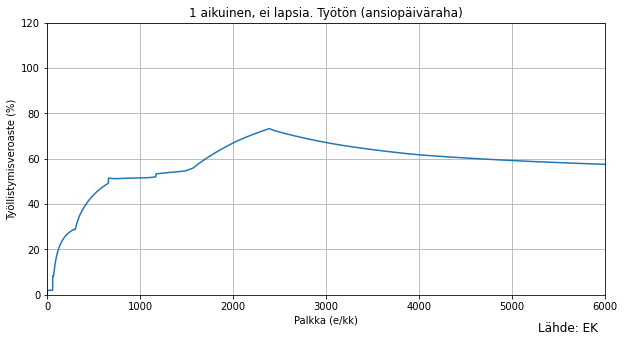

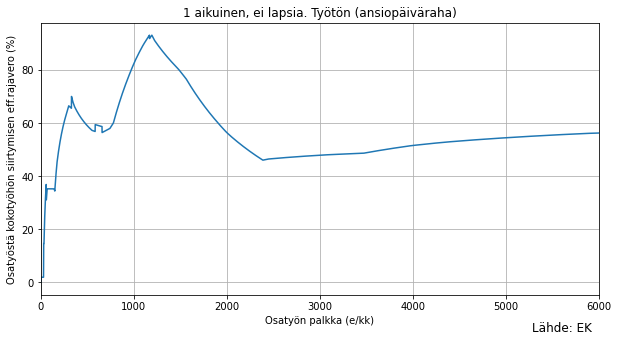

In [6]:
# Luokka Benefits() sisältää koodin
year=2018
baseline_ben=fin_benefits.Benefits()
baseline_ben.set_year(year)
marg=fin_benefits.Marginals(baseline_ben,year=year)

# ja lasketaan & plotataan tulokset
basenetto,baseeff,basetva,baseosatva=marg.laske_ja_plottaa(p)

findfont: Font family ['IBM Plex Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['IBM Plex Sans'] not found. Falling back to DejaVu Sans.


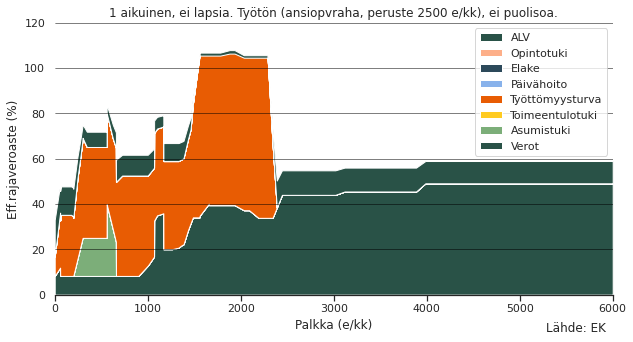

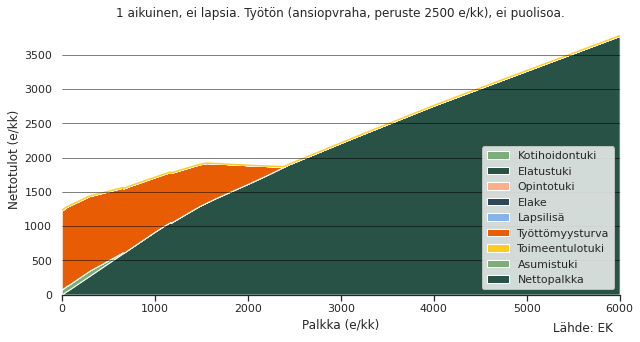

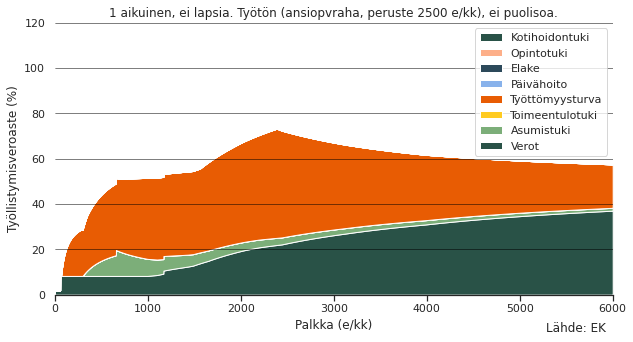

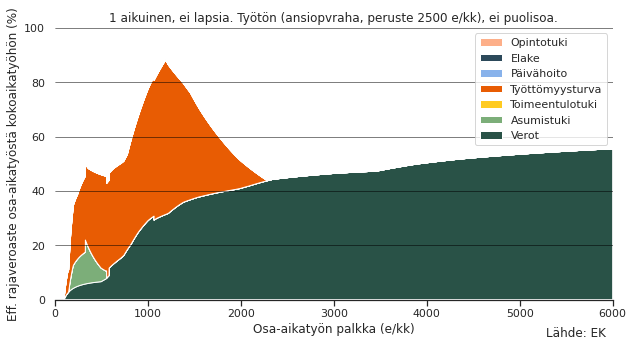

In [8]:
# ja lasketaan & plotataan tulokset
marg.laske_ja_plottaa_marginaalit(p)

## Perustulo

UBI-model perustulokokeilu
Partial UBI True
perustulo_korvaa_toimeentulotuen False


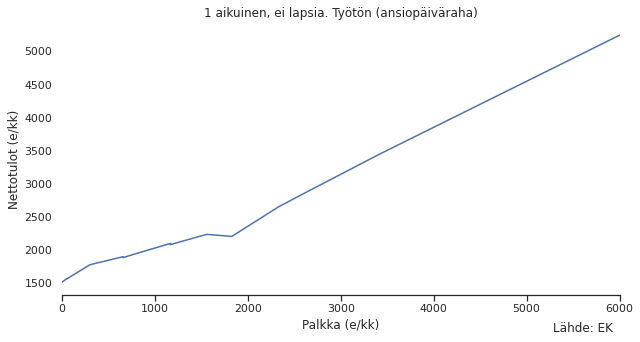

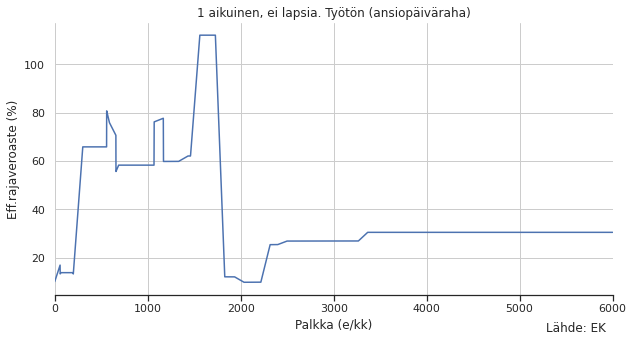

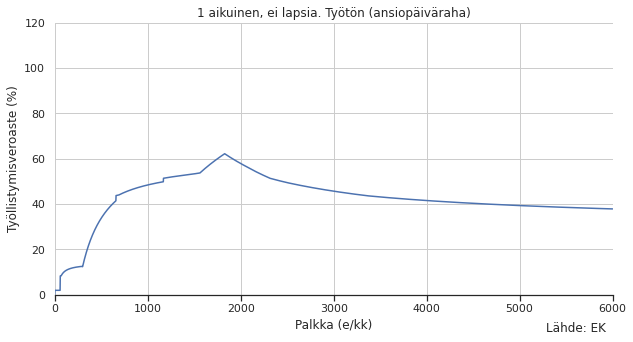

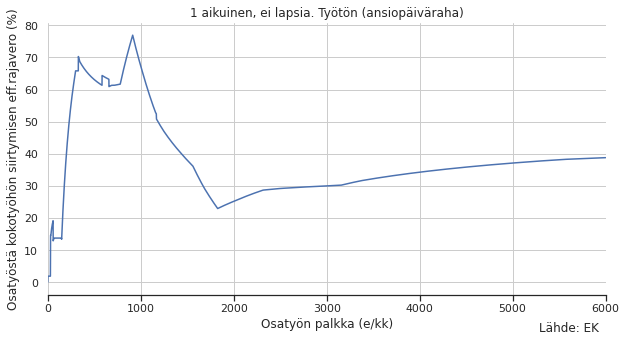

In [11]:
# Luokka Benefits() sisältää koodin
#kw={'perustulomalli':'vihreat'}
kw={'perustulomalli':'perustulokokeilu'}

ben=fin_benefits.BasicIncomeBenefits(kwargs=kw)
ben.set_year(2018)
basic_marg=fin_benefits.Marginals(ben,year=year)

# ja lasketaan & plotataan tulokset
bi_netto,bi_eff,bi_tva,bi_osatva=basic_marg.laske_ja_plottaa(p)

Jaotellaan vielä marginaalit niiden lähteiden mukaan. Nettopalkka sisältää kaikkien talouden aikuisten nettopalkat, kun taas vaaka-akselin Palkka tarkoittaa työllistyvän palkkaa.

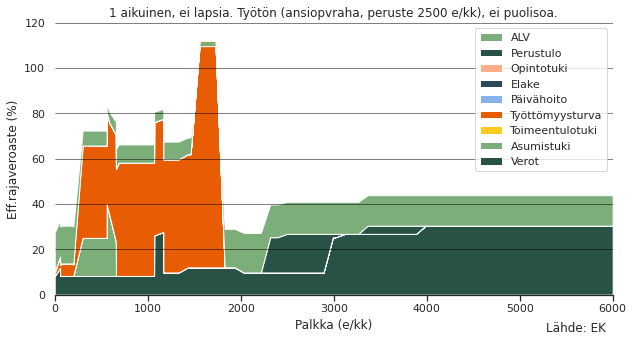

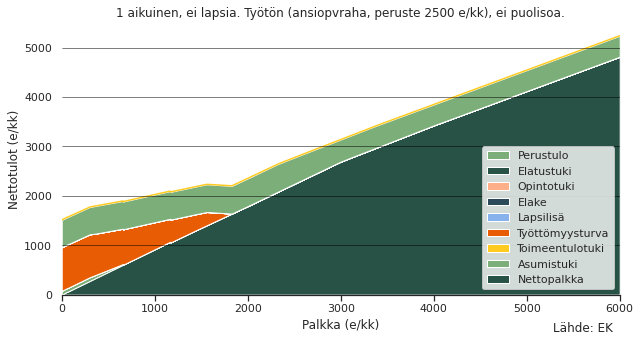

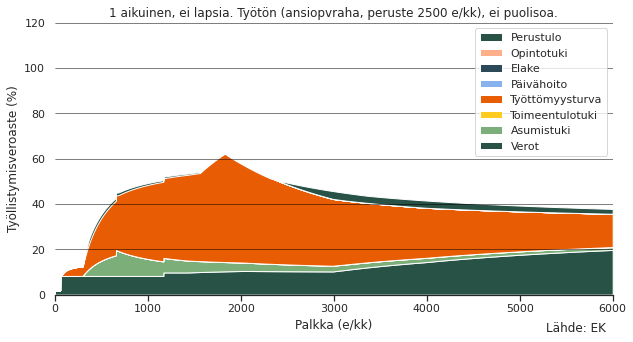

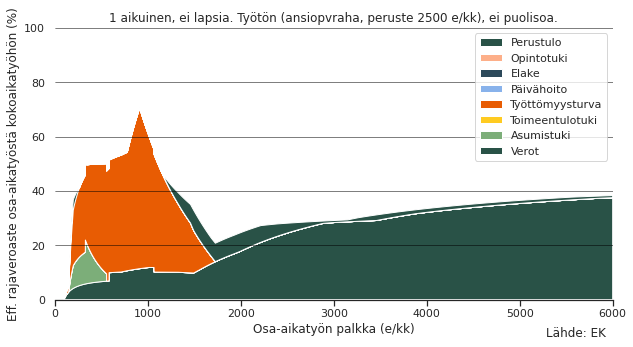

In [12]:
# ja lasketaan & plotataan tulokset
basic_marg.laske_ja_plottaa_marginaalit(p,incl_perustulo=True,incl_elake=True)

# Nykytilan ja perustulon vertailu
Verrataan käteen jäävää tuloa, efektiivistä veroastetta ja työllistymisveroastetta perustulomallissa nykytilaan.

In [ ]:
ben.ansiopaivaraha(1,3000,0,0,1,0,p)

In [ ]:
baseline_ben.ansiopaivaraha(1,3000,0,0,1,0,p)

In [ ]:
v1,b1=ben.laske_tulot(p,tt_alennus=0,include_takuuelake=True)

In [ ]:
ben.peruspaivaraha(1)

In [ ]:
v2,b2=baseline_ben.laske_tulot(p,tt_alennus=0,include_takuuelake=True)

In [ ]:
print('nimike','perustulo','nykytila','erotus')
for i in b2:
    print(i,b1[i],b2[i],b1[i]-b2[i])

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


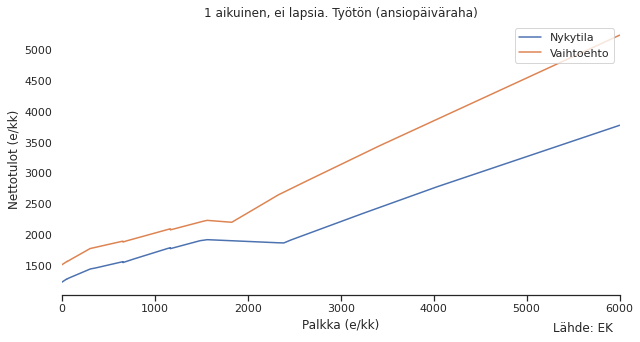

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


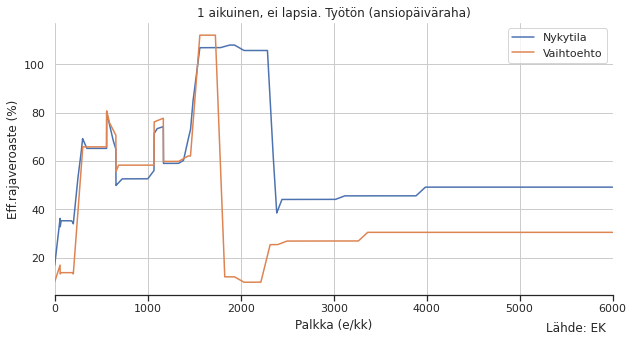

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


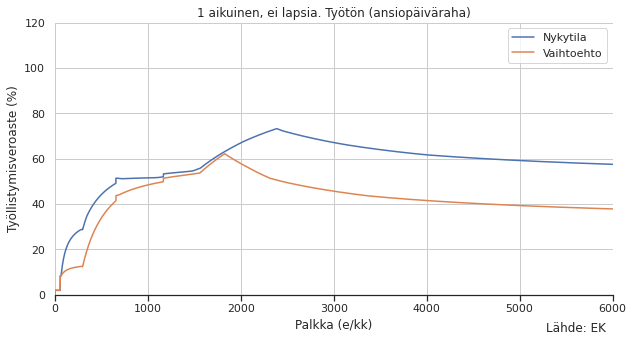

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


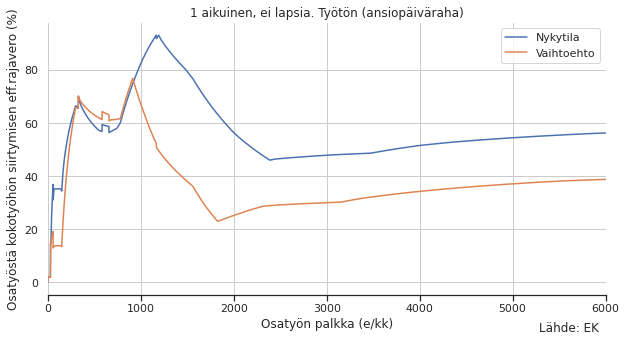

In [13]:
# ja lasketaan & plotataan tulokset
_,_,_,_=basic_marg.laske_ja_plottaa(p,basenetto=basenetto,baseeff=baseeff,
                             basetva=basetva,baseosatva=baseosatva,figname='perustuloverotailu_')

# Kokoelma esimerkkitapauksia

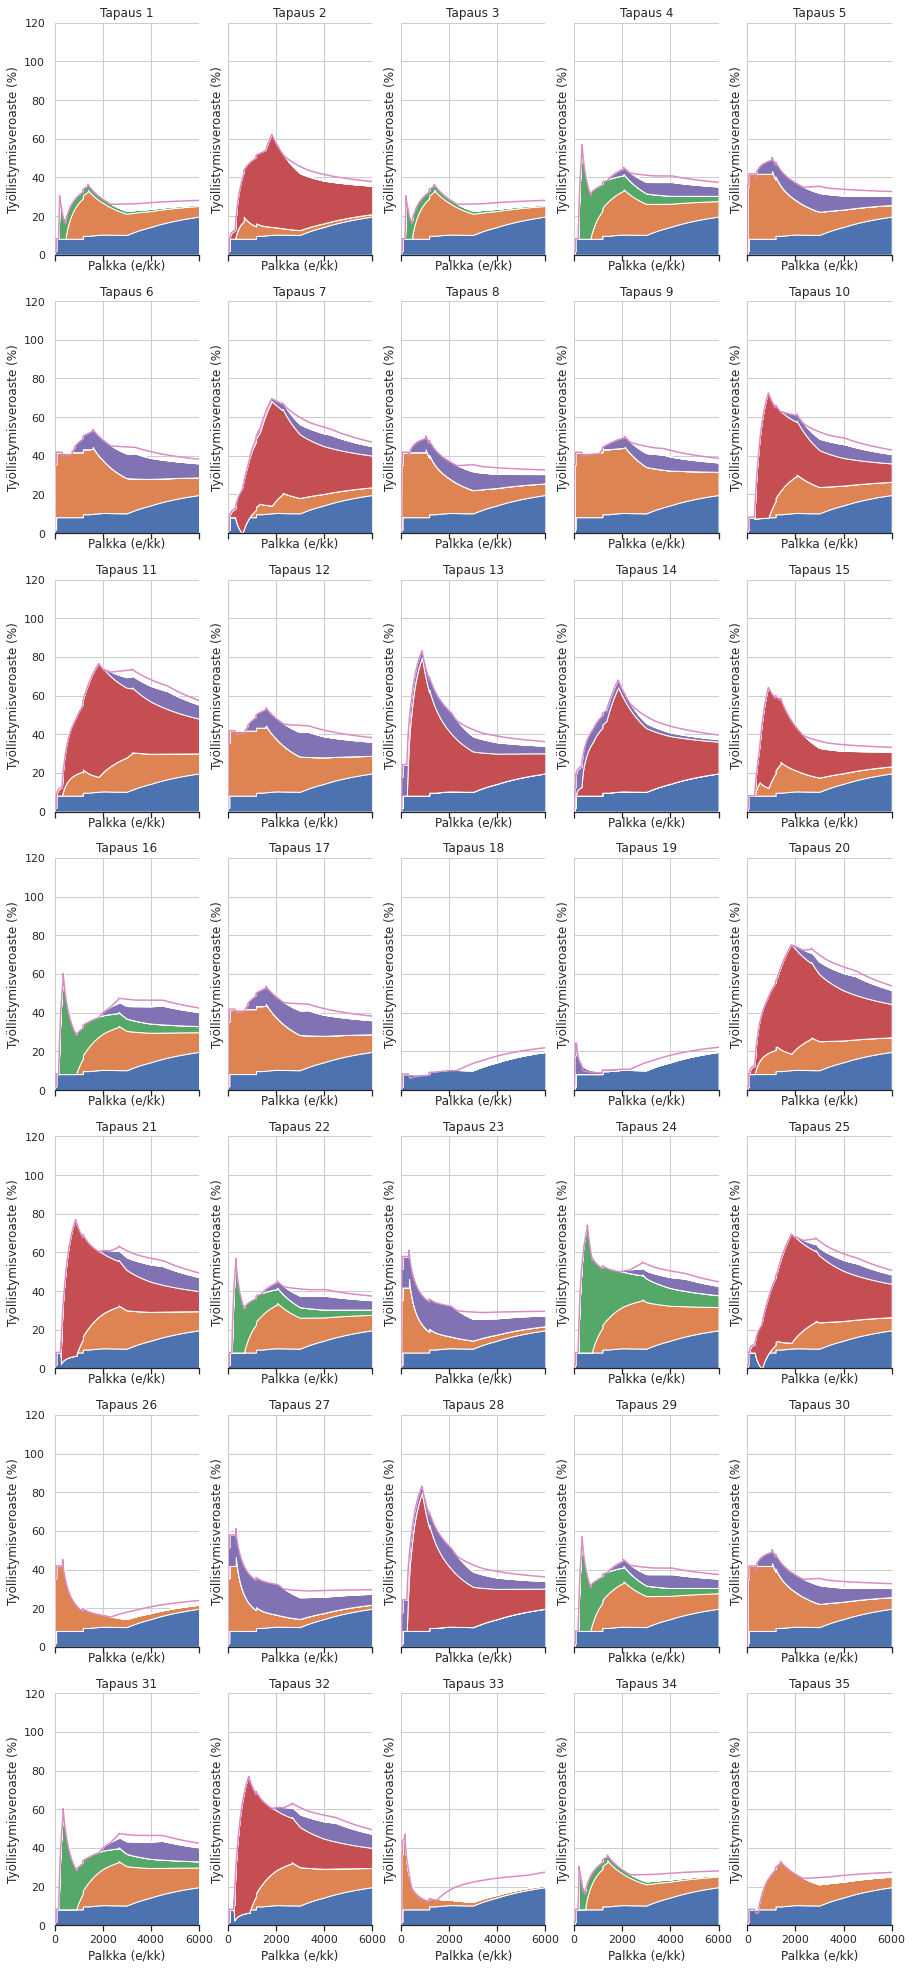

In [14]:
# tämän laskenta on aika hidasta
plt.rcParams['figure.figsize'] = [15, 35]
basic_marg.laske_ja_plottaa_hila(type='tva')
plt.rcParams['figure.figsize'] = [10, 5]

# Kirjallisuus

[1] Viitamäki, H. Työnteon kannustimet - mitä jää käteen? VATT muistiot 50, https://vatt.fi/documents/2956369/3012213/muistio_50.pdf, 2015

[2] Kärkkäinen, O., Tervola, J. Talouspolitiikan vaikutukset tuloeroihin ja työllisyyteen 2015–2018, Valtioneuvoston selvitys- ja tutkimustoiminnan julkaisusarja 59/2018, http://julkaisut.valtioneuvosto.fi/handle/10024/161061, 2018